## This report aims to analyze the data for the Titanic survivors and to answer some questions regarding the profile of the passengers and which parameters may have contributed to the survival of some passengers. The data for this analysis is obtained from the [Udacity website](https://classroom.udacity.com/courses/ud170/lessons/5442503234/concepts/54545126720923) as part of the Final Project of their Intro to Data Analysis Course.

In [1]:
import pandas as pd
import numpy as np

titanic_reader = pd.read_csv('titanic_data.csv')

number_of_passengers = len(titanic_reader['Name'])

print(number_of_passengers)

891


We have the information for 891 passengers out of the 2,208, who boarded the ship in 1909. However, there are also missing values for some passengers throughout the document and I will mention them during the analysis.

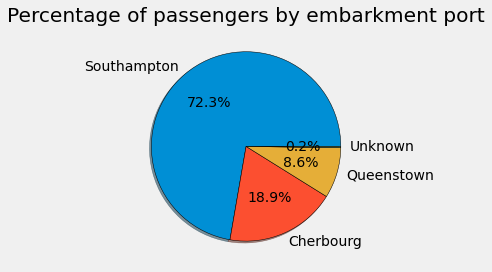

In [10]:
from collections import Counter
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

titanic_reader["Embarked"].replace({"C": "Cherbourg", 
                                    "Q": "Queenstown", 
                                    "S": "Southampton"}, 
                                   inplace=True)

titanic_reader["Embarked"].fillna('Unknown', inplace=True)

passenger_counter = Counter()

for row in titanic_reader:
    passenger_counter.update(titanic_reader["Embarked"])

ports = []    
passenger_count =[]
    
for item in passenger_counter.most_common(4):
    ports.append(item[0])
    passenger_count.append(item[1])

# plt.bar(ports, passenger_count) #it is also possible to use a bar chart but the pie chart makes more sense 
plt.pie(passenger_count, labels = ports, shadow = True, 
        autopct = '%1.1f%%', wedgeprops = {'edgecolor': 'black'})

plt.title("Percentage of passengers by embarkment port")

plt.tight_layout() 

According to the pie chart displayed above, 72.4% of the passengers embarked on the ship from the Southampton port and the remaining passengers embarked from Cherbourg and Queenstown ports.

In [46]:
gender_breakdown = titanic_reader['Sex'].value_counts()
print(gender_breakdown)

male      577
female    314
Name: Sex, dtype: int64


When we look at some demographic data of these 891 passengers, we have 577 male passengers and 314 female passengers as can be seen from the above output. 

In [42]:
passengers_without_age = titanic_reader['Age'].isna().sum()

passenger_with_age = number_of_passengers - passengers_without_age

mean_passenger_age = titanic_reader['Age'].mean().astype(int)
max_passenger_age = titanic_reader['Age'].max().astype(int)
min_passenger_age = titanic_reader['Age'].min().astype(int)

print("The oldest passenger was " + str(max_passenger_age) + " while the youngest passenger was " + str(min_passenger_age) + " and the mean age of the " + str(passenger_with_age) + " passengers, whose ages are available, is " + str(mean_passenger_age) + ".")

The oldest passenger was 80 while the youngest passenger was 0 and the mean age of the 714 passengers, whose ages are available, is 29.


It was already mentioned in the beginning that there are missing values in certain data fields and passenger age is one of them. Accordingly, the mean age of the 714 passengers, whose age information is available is 29 while the ages of the passengers range from babies in the first year of their lives to elderly with a maximum age of 80.

In [27]:
titanic_reader.loc[:, 'Nanny'] = np.nan  # NaN's don't appear in value_counts()
titanic_reader.loc[(titanic_reader['Age'] < 18) & (titanic_reader['Parch'] == 0), 'Nanny'] = "Children traveling with nanny"
titanic_reader.loc[(titanic_reader['Age'] < 18) & (titanic_reader['Parch'] != 0), 'Nanny'] = "Children traveling with parents"

titanic_children = titanic_reader.loc[titanic_reader['Age'] < 18, :].copy()
titanic_children.loc[:, 'Nanny'] = np.where(titanic_children['Parch'] == 0, "Children traveling with nanny", "Children traveling with parents")

In [28]:
titanic_children['Nanny'].value_counts()

Children traveling with parents    81
Children traveling with nanny      32
Name: Nanny, dtype: int64

If we assume that any person below the age of 18, who has no parents traveling with them, to be traveling with a nanny, then our data shows us that 32 children were traveling with their nannies and the remaining 81 were traveling with their parents. But is there a correlation between traveling with a nanny or parent and surviving the Titanic?

In [29]:
titanic_reader['SurvivedN'] = None
titanic_reader.loc[:, 'SurvivedN'] = np.nan
titanic_reader.loc[(titanic_reader['Nanny'] == "Children traveling with nanny") & (titanic_reader['Survived'] == 1), 'SurvivedN'] = "Survived with nanny"
titanic_reader.loc[(titanic_reader['Nanny'] == "Children traveling with parents") & (titanic_reader['Survived'] == 1), 'SurvivedN'] = "Survived with parents"

In [40]:
titanic_reader['SurvivedN'].value_counts()

Survived with parents    45
Survived with nanny      16
Name: SurvivedN, dtype: int64

According to the results shown above, exactly half of the children traveling with their nannies survived the Titanic. While the survival rate for children traveling with their parents is slightly higher, there doesn't seem to be a significant difference.

As we examine the survival rate of children, let's also see check the average age of the survivors. Maybe younger people could rush to the lifeboats before the elderly or the elderly were given priority, which led to their survival.

In [38]:
titanic_reader.loc[(titanic_reader['Survived'] == 1), "Survived"] = "Survived"
titanic_reader.loc[(titanic_reader['Survived'] == 0), "Survived"] = "Did not survive"

titanic_reader.groupby('Survived')['Age'].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
Did not survive,424,30,14,1,21,28,39,74
Survived,290,28,14,0,19,28,36,80


We already determined above that the age data is available for only 714 passengers and as can be seen from the table above, the age aggregation of the passengers, who survived and did not survive is very similar. The minimum ages are almost the same and the oldest survivor is 80 years old, which suggests that age did not play a significant role in the survival of the passengers.

In [36]:
titanic_reader.groupby('Pclass')['Survived'].describe()

,count,unique,top,freq
Pclass,,,,
1,216,2,Survived,136
2,184,2,Did not survive,97
3,491,2,Did not survive,372


When we look at any possible correlation between the ticket class and the survival rate, we can see a clear correlation between ticket class and survival rate. As you can see from the table above, an overwhelming majority of the passengers in the 3rd class did not survive that night. While the survival rate for the 2nd class passengers is a little lower than 50%, around 62% of the 1st class passengers survived Titanic. 